In [1]:
!pip install open_clip_torch transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00


In [2]:
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/2.55G [00:00<?, ?B/s]

In [ ]:
!wget https://i.imgur.com/8H7XCH0.jpg -O cat.jpg

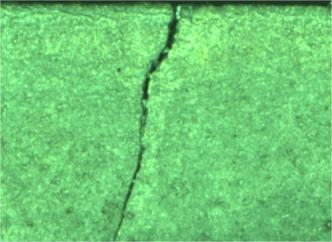

In [3]:
from IPython.display import Image
Image('test.jpg')

In [6]:
from PIL import Image
im = Image.open("test.jpg").convert("RGB")
im = transform(im).unsqueeze(0)

with torch.no_grad(), torch.cuda.amp.autocast():
  generated = model.generate(im)

print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))

<ipython-input-6-1d046861a698>:5: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast():


a crack in the ground is visible in this image . 


In [ ]:
!pip install

In [1]:
from transformers import pipeline
# More models in the model hub.
model_name = "openai/clip-vit-large-patch14-336"
classifier = pipeline("zero-shot-image-classification", model = model_name)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [18]:
image_to_classify = "test.png"
labels_for_classification =  ["a scratch in the image",
                              "a crack in the image",
                              "paint coating peeling  in the image",
                              "good"]
scores = classifier(image_to_classify,
                    candidate_labels = labels_for_classification)



In [19]:
print(scores)

[{'score': 0.5050188899040222, 'label': 'paint coating peeling  in the image'}, {'score': 0.4042166471481323, 'label': 'a scratch in the image'}, {'score': 0.08734914660453796, 'label': 'a crack in the image'}, {'score': 0.003415255108848214, 'label': 'good'}]


In [17]:
print(f"The highest score is {scores[0]['score']:.3f} for the label {scores[0]['label']}")



The highest score is 0.852 for the label paint coating peeling  in the image
